In [8]:
import numpy as np
import pandas as pd                     
import matplotlib.pyplot as plt


In [23]:
df = pd.read_csv("model_eval.csv")
fdf = pd.read_csv("model_eval_full.csv")

In [28]:
fdf.tail()
ndf = fdf.fillna(fdf.mean())
ndf.tail()

,M1,M2,M3,M4
259,5,2.333333,2.0,2.458333
260,3,2.333333,2.0,2.458333
261,4,2.333333,3.0,2.458333
262,5,2.333333,3.0,2.458333
263,5,2.333333,5.0,2.458333


In [12]:
array = df.to_numpy()
print(df.mean())
print(df.std())

M1    2.375000
M2    2.275000
M3    2.483333
M4    2.458333
dtype: float64
M1    1.478487
M2    1.377871
M3    1.472341
M4    1.437176
dtype: float64


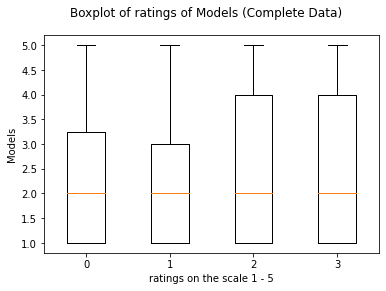

M1    2.905303
M2    2.333333
M3    2.758333
M4    2.458333
dtype: float64
M1    1.601606
M2    1.035492
M3    1.456575
M4    0.966731
dtype: float64


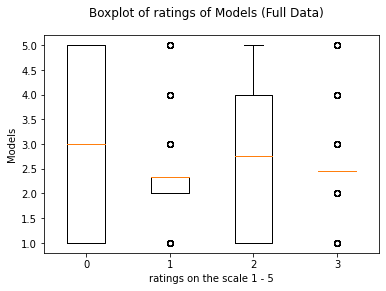

In [31]:

posit = range(array.shape[1])
fig, ax = plt.subplots()
ax.boxplot(array, positions=posit, )
plt.suptitle('Boxplot of ratings of Models (Complete Data)')
plt.xlabel('ratings on the scale 1 - 5')
plt.ylabel('Models')

plt.show()

print(ndf.mean())
print(ndf.std())

array2 = ndf.to_numpy()
posit = range(array2.shape[1])
fig, ax = plt.subplots()
ax.boxplot(array2, positions=posit, )
plt.suptitle('Boxplot of ratings of Models (Full Data)')
plt.xlabel('ratings on the scale 1 - 5')
plt.ylabel('Models')

plt.show()

In [13]:
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [16]:
mean_confidence_interval(df['M1'])

(2.375, 2.107752261042825, 2.642247738957175)

In [32]:
print(mean_confidence_interval(ndf['M1']))
print(mean_confidence_interval(ndf['M2']))
print(mean_confidence_interval(ndf['M3']))
print(mean_confidence_interval(ndf['M4']))


(2.9053030303030303, 2.7112121897634474, 3.099393870842613)
(2.3333333333333335, 2.2078471411704976, 2.4588195254961693)
(2.7583333333333333, 2.581818177554629, 2.9348484891120377)
(2.4583333333333335, 2.3411799152779666, 2.5754867513887003)


In [17]:
mean_confidence_interval(df['M2'])

(2.275, 2.0259393378208044, 2.5240606621791954)

In [18]:
mean_confidence_interval(df['M3'])

(2.4833333333333334, 2.2171966201959146, 2.749470046470752)

In [19]:
mean_confidence_interval(df['M4'])

(2.4583333333333335, 2.198552820278386, 2.718113846388281)

In [20]:
import statsmodels.stats.api as sms
sms.DescrStatsW(df['M4']).tconfint_mean()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(2.198552820278386, 2.718113846388281)

In [34]:
cm = sms.CompareMeans(sms.DescrStatsW(df['M1']), sms.DescrStatsW(df['M2']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(df['M1']), sms.DescrStatsW(df['M3']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(df['M1']), sms.DescrStatsW(df['M4']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(df['M2']), sms.DescrStatsW(df['M3']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(df['M2']), sms.DescrStatsW(df['M4']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(df['M3']), sms.DescrStatsW(df['M4']))
print(cm.tconfint_diff(usevar='unequal'))

(-0.26345405039029907, 0.46345405039029924)
(-0.48356665034748475, 0.26689998368081796)
(-0.45413299181235184, 0.2874663251456849)
(-0.5709784668190123, 0.1543118001523453)
(-0.5413824427491367, 0.17471577608246958)
(-0.34500745010968026, 0.3950074501096801)


In [35]:
cm = sms.CompareMeans(sms.DescrStatsW(ndf['M1']), sms.DescrStatsW(ndf['M2']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(ndf['M1']), sms.DescrStatsW(ndf['M3']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(ndf['M1']), sms.DescrStatsW(ndf['M4']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(ndf['M2']), sms.DescrStatsW(ndf['M3']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(ndf['M2']), sms.DescrStatsW(ndf['M4']))
print(cm.tconfint_diff(usevar='unequal'))
cm = sms.CompareMeans(sms.DescrStatsW(ndf['M3']), sms.DescrStatsW(ndf['M4']))
print(cm.tconfint_diff(usevar='unequal'))

(0.3412896449682048, 0.802649748971187)
(-0.11478323945233443, 0.4087226333917284)
(0.22067196409347833, 0.6732674298459126)
(-0.641128567525408, -0.20887143247458986)
(-0.29627922384968586, 0.04627922384968497)
(0.088560035831696, 0.511439964168301)
